<a href="https://colab.research.google.com/github/lschoch/MLA_LHS/blob/main/MLA4_LHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Assignment 4**  
## **Lawrence Schoch**
## **CS430**
## **Machine Learning in the Cloud** 
---

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for Decision Trees

In [4]:
# Import models.
from sklearn import tree
from sklearn.tree import export_text

## Imports for Splitting Data and Building Pipeline


In [5]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [12]:
from sklearn import set_config
set_config(display='diagram')

# Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

The function below plots a straight line on a plot.

In [8]:
def abline(slope, intercept, color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

## Problem 1: Decision Tree Classification

### Reading the Data

In [9]:
df = pd.read_csv('/content/gdrive/MyDrive/1CS430/banknote_authentication.csv')

### Splitting Data into Train/Test

In [10]:
X = df.drop(['forgery'], axis=1)
y = df['forgery']
#Split the data into Train/Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [13]:
num_attribs = ['variance', 'skewness', 'curtosis', 'entropy']
col_transform = ColumnTransformer(transformers=[
                 ('num', MinMaxScaler(), num_attribs)],
                 remainder='passthrough')
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('decision_tree', tree.DecisionTreeClassifier())
]) 
pipeline          

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier())])

### Executing the Model

In [15]:
pipeline.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier())])

### Evaluating Model

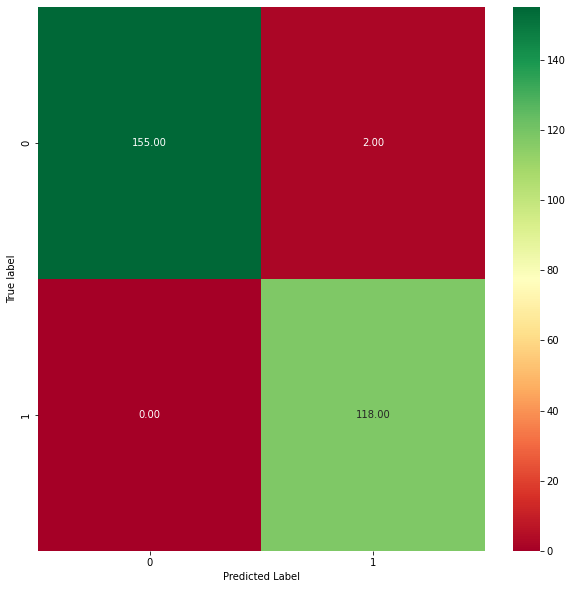

In [16]:
# Make predictions on the test data.
y_pred = pipeline.predict(X_test)
# Call the plot_cm function to generate the confusion matrix.
plot_cm(y_test, y_pred)

In [17]:
# Calculate the precision, recall, and F1 score. 
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Precision: 0.9833333333333333
Recall: 1.0
F1 score: 0.9915966386554621


### Interpretation of the results.
The confusion matrix shows that the model correctly detected 118 of 118 forgeries in the test data for a recall (sensitivity) of 100%. There were only 2 false postives for a precision of 118/(118 + 2) = 98.33%. The F1 score is also quite high for this model at 99.16%, and this would be expected given the high recall and precision. 
<br><br>
With all models we need to consider the possibility of overfitting. The following analysis was taken from [https://machinelearningmastery.com/overfitting-machine-learning-models/](https://machinelearningmastery.com/overfitting-machine-learning-models/). In this analysis, accuracy score is plotted against max_depth over a range of max_depth values. Given that accuracies of predictions based on the test data follow very closely the accuracies of predictions based on the training datas, overfitting does not appear to be an issue, but it is apparent that performance plateaus at max_depth of 7, so from the standpoint of efficiency, the max_depth should be set at 7 or possibly 8 to provide a margin of safety.

>1, train: 0.858, test: 0.833
>2, train: 0.917, test: 0.909
>3, train: 0.941, test: 0.924
>4, train: 0.964, test: 0.935
>5, train: 0.986, test: 0.971
>6, train: 0.997, test: 0.985
>7, train: 1.000, test: 0.993
>8, train: 1.000, test: 0.993
>9, train: 1.000, test: 0.993
>10, train: 1.000, test: 0.993
>11, train: 1.000, test: 0.993
>12, train: 1.000, test: 0.993
>13, train: 1.000, test: 0.993
>14, train: 1.000, test: 0.993
>15, train: 1.000, test: 0.993
>16, train: 1.000, test: 0.993
>17, train: 1.000, test: 0.993
>18, train: 1.000, test: 0.993
>19, train: 1.000, test: 0.993
>20, train: 1.000, test: 0.993



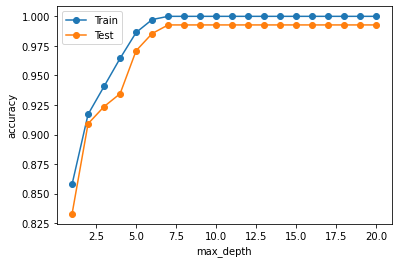

In [25]:
from sklearn.metrics import accuracy_score
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = tree.DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
print()
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

### Conclusion
This decision tree classifier produced an excellent model for predicting forgeries from the scaled numeric variables, `variance`, `curtosis`, `skewness`, and `entropy`. Therefore, it should be quite suitable for that purpose. This model was 100% sensitive for detecting forgeries and its precision was 98.33%. It is interesting to note that this model performed slighly better than the model obtained with a support vector machine (MLA3_LHS) in that there were only two instead of 4 false positives, giving a slightly higher precision. With such excellent performance statistics there is always concern regarding overfitting, but plotting analysis vs. max_depth was not suggestive of overfitting with this model. 

## Problem 2

### Reading the Data

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/1CS430/Steel_industry_data.csv')

In [ ]:
# Rename the columns.
df.rename(columns = {'Usage_kWh':'usage_kwh'},inplace=True)
df.rename(columns = {'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh'},inplace=True)
df.rename(columns = {'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh'},inplace=True)
df.rename(columns = {'Lagging_Current_Power_Factor':'lag_current_pwr'},inplace=True)
df.rename(columns = {'Leading_Current_Power_Factor':'lead_current_pwr'},inplace=True)
df.rename(columns = {'NSM':'nsm'},inplace=True)
df.rename(columns = {'WeekStatus':'week_status'},inplace=True)
df.rename(columns = {'Day_of_week':'day_of_week'},inplace=True)
df.rename(columns = {'Load_Type':'load_type'},inplace=True)

### Splitting Data into Train/Test

In [ ]:
X = df.loc[:,'lag_react_pwr_kvarh':'load_type']
y = df['usage_kwh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Building the Pipeline

In [ ]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week', 'load_type']
col_transform = ColumnTransformer(transformers=[
                 ('cat', OneHotEncoder(), cat_attribs),
                 ('num', MinMaxScaler(), num_attribs)],
                 remainder='passthrough')
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('svr_model', SVR(kernel='linear', C=1, max_iter=100000, epsilon=0.0))
]) 
from sklearn import set_config
set_config(display='diagram')
pipeline                             

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('svr_model',
                 SVR(C=1, epsilon=0.0, kernel='linear', max_iter=100000))])

### Executing the Model

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('svr_model',
                 SVR(C=1, epsilon=0.0, kernel='linear', max_iter=100000))])

### Evaluating Model

In [ ]:
# Make predictions on the training data.
y_train_pred = pipeline.predict(X_train)
# Make predictions on the test data.
y_pred = pipeline.predict(X_test)
# Get the root mean square errors for both 
RMSE_train = (mean_squared_error(y_train, y_train_pred))**.5
RMSE_test = (mean_squared_error(y_test, y_pred))**.5
print('RMSE_train =',RMSE_train,'  RMSE_test =',RMSE_test)

RMSE_train = 4.638666209940008   RMSE_test = 5.139876825913361


The RMSE values obtained here with SVR using a linear kernel are very close to those that were obtained in a previous assignment with linear regression. (Results for the linear regression model were: RMSE_train = 4.582075664388731,    RMSE_test = 5.051067083537763). This is possibly not surprising since both approaches used a linear model. The RMSE for the test data in both cases is higher than the RMSE for the train data suggesting some degree of overfitting. 

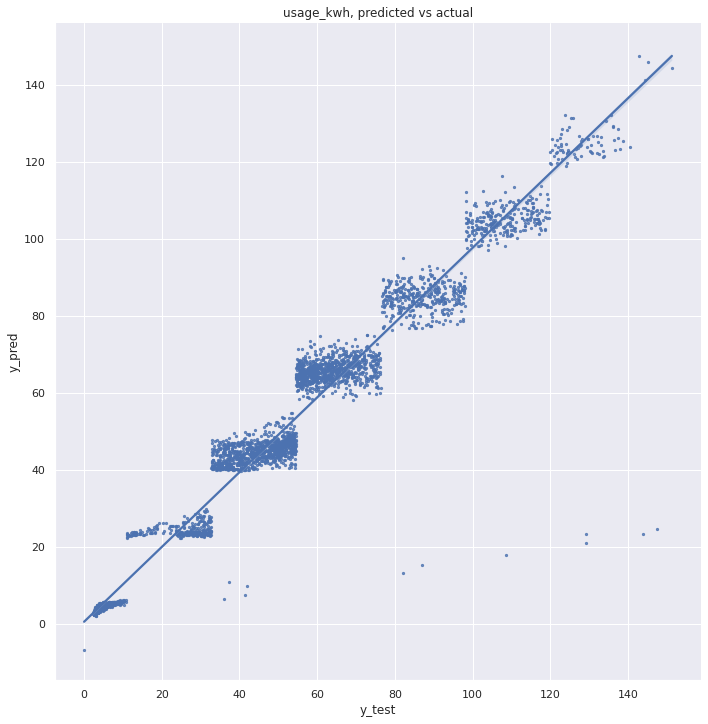

In [ ]:
# Plot predicted vs actual
data = {'y_test': y_test, 'y_pred': y_pred}
df2 = pd.DataFrame(data)
sns.set(rc = {'figure.figsize':(50,50)})
sns.lmplot(x='y_test', y='y_pred', data=df2, height=10, aspect=1, scatter_kws={"s": 5}).set(title='usage_kwh, predicted vs actual')
plt.show()

### Conclusion
The performance of this SVR model using a linear kernel is essentially the same as the performance seen with linear regression in a previous assignment. Plotting the predicted vs actual kwh usage for this model shows the same segmentation pattern and outliers that were seen with the linear regression model. Even though the magnitudes of the RMSE's for these models are probably acceptable, the segmentation is suggestive of overfitting, raising concerns about the degree of generalization error that could be seen with out of sample data. Thus, these models would need improving before they could be considered suitable for predicting kwh usage. (Improvements were discussed and demonstrated in the previous assignment.) 